In [109]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
""" Readme: 
    This is a exercise on tensorflow\keras neural network
    used a synthetic data
"""

In [23]:
df = pd.read_csv('../Data/fake_reg.csv')

In [24]:
df.head() # simple dataset sytethic

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [25]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
price       1000 non-null float64
feature1    1000 non-null float64
feature2    1000 non-null float64
dtypes: float64(3)
memory usage: 23.5 KB


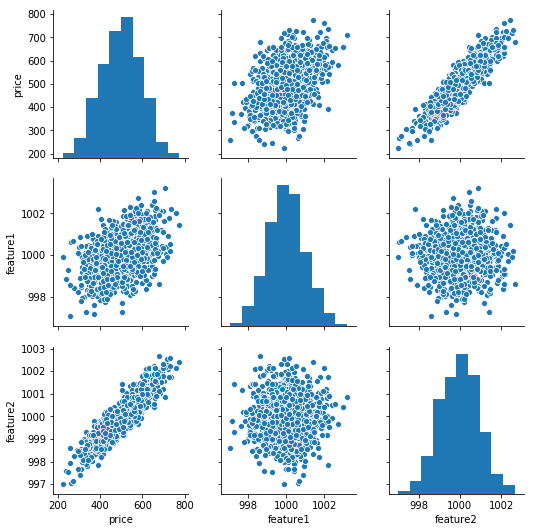

In [27]:
sns.pairplot(df)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = df[['feature1','feature2']].values
y = df['price'].values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [70]:
X_train = scaler.transform(X_train)

In [71]:
X_test = scaler.transform(X_test)

###  Neural Network Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [73]:
model = Sequential()

model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))
model.add(Dense(4, activation = 'relu'))

model.add(Dense(1)) #Output layer

model.compile(optimizer = 'rmsprop',
             loss = 'mse')

In [ ]:
model.fit(x = X_train, y = y_train, epochs = 250)

In [75]:
loss_df = pd.DataFrame(model.history.history)

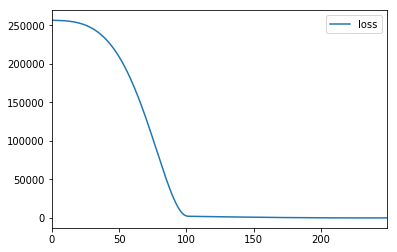

In [76]:
loss_df.plot()

In [77]:
model.evaluate(X_test, y_test, verbose = 0)

25.207322540283204

In [78]:
model.evaluate(X_train,y_train, verbose = 0)

23.87438478742327

In [87]:
test_predictions = model.predict(X_test)

In [88]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [89]:
pred_df = pd.DataFrame(y_test,columns = ['Test True Y'])

In [90]:
pred_df = pd.concat([pred_df, test_predictions], axis = 1)

In [93]:
pred_df.columns = ['Test True Y', 'Model Predictions']

In [94]:
pred_df.head()

,Test True Y,Model Predictions
0,402.296319,405.820923
1,624.156198,623.496155
2,582.455066,592.091797
3,578.588606,572.498779
4,371.224104,367.595703


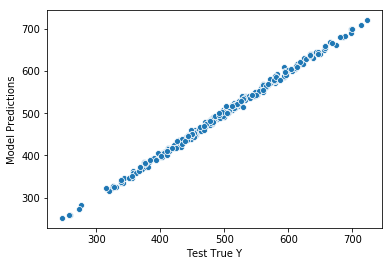

In [108]:
sns.scatterplot(x = 'Test True Y', y = 'Model Predictions', data = pred_df)

### Checking Some Metrics

In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [97]:
mean_absolute_error(pred_df['Test True Y'], pred_df['Model Predictions'])

4.044836739246466

In [103]:
mean_squared_error(pred_df['Test True Y'], pred_df['Model Predictions'])

25.207325782008308

Test on a new 'fake' data

In [99]:
new_data = [[998,1000]]

In [100]:
new_data = scaler.transform(new_data)

In [106]:
model.predict(new_data)

array([[420.5016]], dtype=float32)

### Save and Load Model

In [104]:
from tensorflow.keras.models import load_model

In [105]:
model.save('model.h5')

In [ ]:
SavedModel = load_model('model.h5') 